# Problem Set 1
## What should you turn in?

Your writeup should have:
* The code you used to do the analysis
* Any plots that were asked for
* Answers in plain English to all the qualitative questions

Your writeup should not have:
* Excessive amounts of copy-pasted computer output with no explanations

## The assignment
* Generate 30 Gaussian random variables, all with the same mean 10 and standard deviation 2. Compute the sample average. Repeat this process 100 times and plot the sample averages you get. Show at least two different ways of plotting the set of sample averages. What kind of plot (or kinds of plots) are most appropriate here and why? Briefly describe and explain the resulting plot.

For the remainder of the problem set, you'll be working with the cereal dataset. This contains data on several breakfast cereals. For more details about the data, see original source, but note that we've eliminated many of the columns that aren't as interesting for this assignment, and the "shelf" variable is "low", "middle", or "high".

* Plot the data and explore the relationships between the variables. In a sentence or two, describe your findings.

* Is there a significant difference between the sugar content of cereals in the middle shelf vs. the top shelf? How about the fiber content? Why might there be a difference? Your explanation for why should be convincing and understandable by a fourth grader. Justify which test you chose and the settings you used for that test (one-sided vs two-sided, pooled vs non-pooled* variance, matched pairs, etc.).

* Suppose you are asked to download the full data with all the nutrition information (see link above) and repeat question 2 for every nutrient and for every pair of shelves. Why is this a bad idea? What might you do to obtain a result that's still valid? (Hint: see this xkcd)

In [23]:
import numpy as np
import pandas as pd
import random
import scipy.stats as ss
%matplotlib inline
random.seed(11122016) #Today's Date

### Generating Gaussian Random Variable Means
Due to pandas visualization capabilities, I threw the generator function's output array into a dataframe after creating the 30 sample guassian random variables with the same mean 10 and standard deviation 2.

In [2]:
sample_means = pd.DataFrame([np.mean([np.random.normal(10,2) for i in range(30)]) for i in range(100)],columns=['Means'])

Below, I show 4 different ways that you could go about plotting the means. Although the normal line plot is not too great, I wanted to show the output. If given this task by an employer, I would definitely show either a histogram, boxplot, or kde. I also tested bar charts and that was absolutely horrendous. Therefore, a histogram, boxplot, or kde would be the best plots to really get an idea of what the means look like.

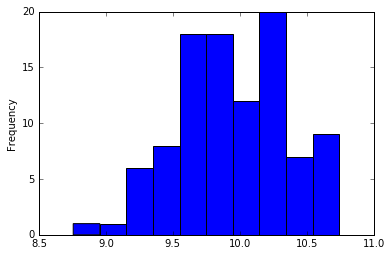

In [3]:
sample_means.Means.plot(kind='hist')

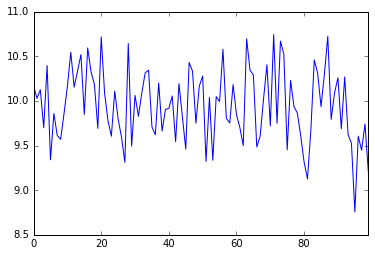

In [4]:
sample_means.Means.plot()

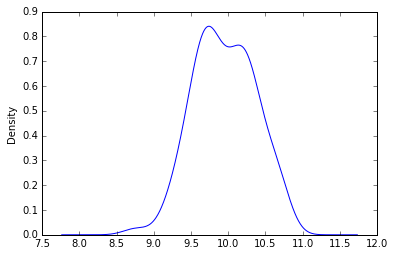

In [5]:
sample_means.Means.plot(kind='kde')

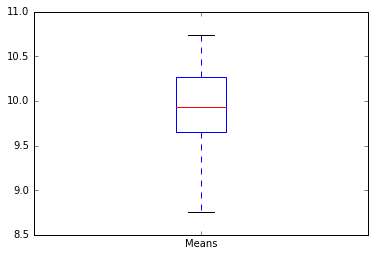

In [6]:
sample_means.Means.plot(kind='box')

### Cereal Dataset Questions
#### Question 1

In [7]:
df = pd.read_csv('cereal_simple.csv',sep=',',header=0)
print 'The column values are:'
for col in df.columns.values:
    print col

The column values are:
name
mfr
sodium
fiber
carbo
sugars
shelf


In [8]:
df.head()

,name,mfr,sodium,fiber,carbo,sugars,shelf
0,100%_Bran,N,130,10.0,5.0,6,high
1,100%_Natural_Bran,Q,15,2.0,8.0,8,high
2,All-Bran,K,260,9.0,7.0,5,high
3,All-Bran_with_Extra_Fiber,K,140,14.0,8.0,0,high
4,Apple_Cinnamon_Cheerios,G,180,1.5,10.5,10,low


In [9]:
df.dtypes

name       object
mfr        object
sodium      int64
fiber     float64
carbo     float64
sugars      int64
shelf      object
dtype: object

    carbo                                                     
    count       mean       std   min   25%    50%    75%   max
mfr                                                           
A     1.0  16.000000       NaN  16.0  16.0  16.00  16.00  16.0
G    22.0  14.727273  3.347804  10.5  12.0  14.25  16.75  21.0
K    23.0  15.130435  4.465060   7.0  12.0  15.00  19.00  22.0
N     5.0  15.000000  5.958188   5.0  15.0  16.00  19.00  20.0
P     9.0  13.222222  1.922094  11.0  12.0  13.00  14.00  17.0
Q     7.0  11.571429  1.988060   8.0  11.0  12.00  12.50  14.0
R     7.0  18.142857  3.132016  15.0  16.0  17.00  20.00  23.0


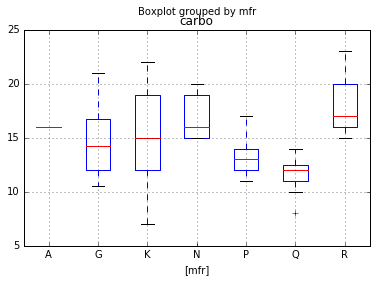

In [10]:
print df[['mfr','carbo']].groupby('mfr').describe().unstack()
df[['mfr','carbo']].boxplot(by='mfr')

    sodium                                                          
     count        mean        std    min    25%    50%    75%    max
mfr                                                                 
A      1.0    0.000000        NaN    0.0    0.0    0.0    0.0    0.0
G     22.0  200.454545  44.021345  140.0  180.0  200.0  217.5  290.0
K     23.0  174.782609  84.132988    0.0  132.5  170.0  225.0  320.0
N      5.0   29.000000  56.833089    0.0    0.0    0.0   15.0  130.0
P      9.0  146.111111  55.157602   45.0  135.0  160.0  180.0  210.0
Q      7.0  105.714286  99.600392    0.0    7.5  135.0  185.0  220.0
R      7.0  197.857143  61.227523   95.0  170.0  200.0  235.0  280.0


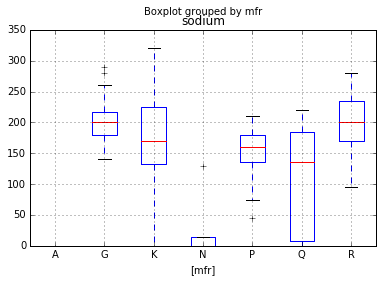

In [11]:
print df[['mfr','sodium']].groupby('mfr').describe().unstack()
df[['mfr','sodium']].boxplot(by='mfr')

    sugars                                                 
     count      mean       std  min   25%   50%   75%   max
mfr                                                        
A      1.0  3.000000       NaN  3.0  3.00   3.0   3.0   3.0
G     22.0  7.954545  3.872704  1.0  3.75   8.5  10.0  14.0
K     23.0  7.565217  4.500768  0.0  3.00   7.0  12.0  15.0
N      5.0  2.200000  3.033150  0.0  0.00   0.0   5.0   6.0
P      9.0  8.777778  4.576510  3.0  5.00  10.0  12.0  15.0
Q      7.0  6.142857  4.775932  0.0  3.00   6.0   9.5  12.0
R      7.0  5.857143  3.760699  2.0  3.00   5.0   8.5  11.0


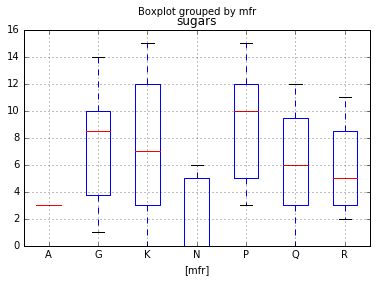

In [12]:
print df[['mfr','sugars']].groupby('mfr').describe().unstack()
df[['mfr','sugars']].boxplot(by='mfr')

    fiber                                              
    count      mean       std  min  25%  50%  75%   max
mfr                                                    
A     1.0  0.000000       NaN  0.0  0.0  0.0  0.0   0.0
G    22.0  1.272727  1.241421  0.0  0.0  1.5  2.0   4.0
K    23.0  2.739130  3.193991  0.0  1.0  1.0  3.0  14.0
N     5.0  4.600000  3.049590  3.0  3.0  3.0  4.0  10.0
P     9.0  2.777778  2.333333  0.0  0.0  3.0  5.0   6.0
Q     7.0  1.142857  0.899735  0.0  0.5  1.0  2.0   2.0
R     7.0  2.000000  1.632993  0.0  0.5  3.0  3.0   4.0


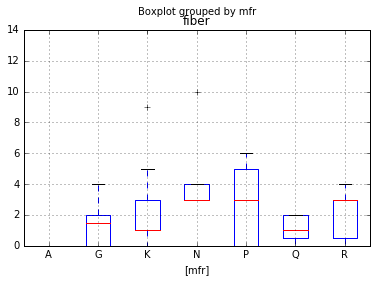

In [13]:
print df[['mfr','fiber']].groupby('mfr').describe().unstack()
df[['mfr','fiber']].boxplot(by='mfr')

shelf  high  low  middle
mfr                     
A       0.0  0.0     1.0
G       9.0  6.0     7.0
K      12.0  4.0     7.0
N       1.0  3.0     1.0
P       6.0  2.0     1.0
Q       4.0  0.0     3.0
R       3.0  4.0     0.0


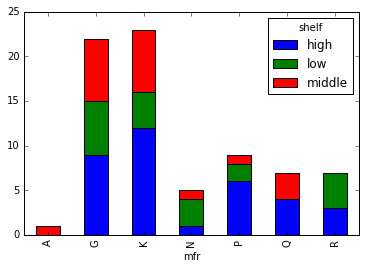

In [14]:
df2 = df.groupby(['mfr','shelf'])['mfr'].count().unstack('shelf').fillna(0)
print df2
df2.plot(kind='bar',stacked=True)

#### Question 2

In [15]:
question2_df = df[df.shelf!='low']

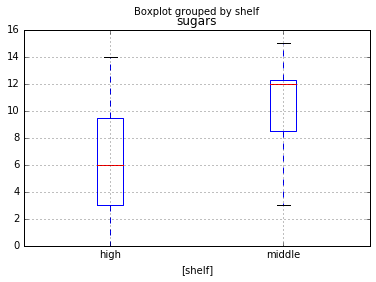

In [21]:
question2_df[['shelf','sugars']].boxplot(by='shelf')

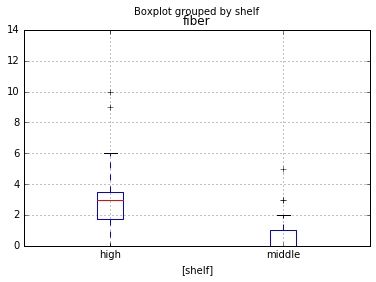

In [22]:
question2_df[['shelf','fiber']].boxplot(by='shelf')

In [30]:
print "Using the Kolmogorov-Smirnov statistic on 2 samples:\n"
print "p-value for the sugars:"
print ss.ks_2samp(question2_df[question2_df.shelf=='high'].sugars,question2_df[question2_df.shelf=='middle'].sugars).pvalue

print "\np-value for the fiber:"
print ss.ks_2samp(question2_df[question2_df.shelf=='high'].fiber,question2_df[question2_df.shelf=='middle'].fiber).pvalue

Using the Kolmogorov-Smirnov statistic on 2 samples:

p-value for the sugars:
0.0051557054694

p-value for the fiber:
0.000239674684342


#### Question 3

Downloading all of the data and repeating the data analysis requested in question 2 for every nutrient and for every pair of shelves is potentially a bad idea. While there may be some interesting insights, repeating this process for everything will lead to multiple cases where certain relationships occurred by chance. Also, from an insights perspective, an analyst who tries to look at every relationship will ultimately overfit what is seen in some way. The analysis becomes too complex and ultimately not that beneficial. Something to obtain a result that might still be valid is to use a tree method such as a normal decision tree or random forest to determine feature importances. This might provide insight into what relationships are consistently significant when a subset of the features are looked at or one is trying to predict a category or value.